<a href="https://colab.research.google.com/github/AIML25/AIML_2025_B15/blob/main/lab%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

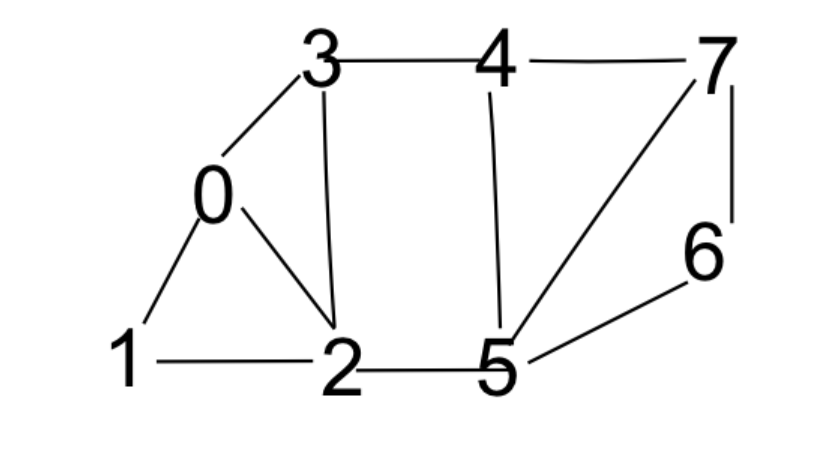

In [5]:
from queue import Queue

graph = {0: [1, 2, 3],
         1: [0, 2],
         2: [1, 3, 5],
         3: [0, 2, 4],
         4: [3, 5, 7],
         5: [2, 4, 6, 7],
         6: [5, 7],
         7:[]}
print("The adjacency List representing the graph is:")
print(graph)


def bfs(graph, source):
    Q = Queue()
    visited_vertices = set()
    Q.put(source)
    visited_vertices.update({source})
    while not Q.empty():
        vertex = Q.get()
        print(vertex, end="-->")
        for u in graph[vertex]:
            if u not in visited_vertices:
                Q.put(u)
                visited_vertices.update({u})

print("BFS traversal of graph with source 1 is:")
bfs(graph, 1)


The adjacency List representing the graph is:
{0: [1, 2, 3], 1: [0, 2], 2: [1, 3, 5], 3: [0, 2, 4], 4: [3, 5, 7], 5: [2, 4, 6, 7], 6: [5, 7], 7: []}
BFS traversal of graph with source 1 is:
1-->0-->2-->3-->5-->4-->6-->7-->

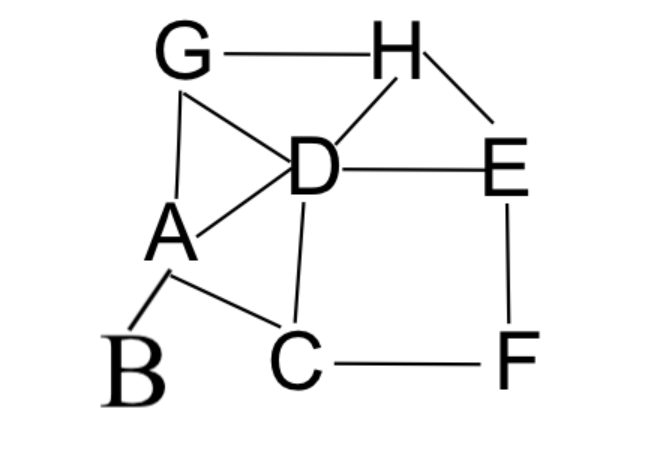

In [2]:
graph1 = {
    'A' : ['B','C','G'],
    'B' : ['A'],
    'C' : ['A','D','F',],
    'D' : ['A','C','E','H'],
    'E' : ['D','H','F'],
    'F' : ['C','E'],
    'G' : ['A','D','H'],
    'H' : ['D','E','G']
}

def dfs(graph, node, visited):
    if node not in visited:
        visited.append(node)
        for k in graph[node]:
            dfs(graph,k, visited)
    return visited

visited = dfs(graph1,'B', [])
print(visited)

['B', 'A', 'C', 'D', 'E', 'H', 'G', 'F']


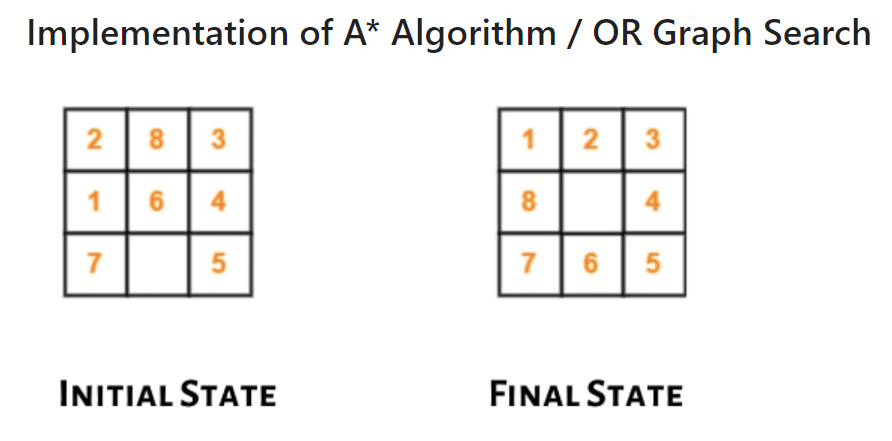

In [4]:
from copy import deepcopy
import numpy as np
import time

def bestsolution(state):
    bestsol = np.array([], int).reshape(-1, 9)
    count = len(state) - 1
    while count != -1:
        bestsol = np.insert(bestsol, 0, state[count]['puzzle'], 0)
        count = (state[count]['parent'])
    return bestsol.reshape(-1, 3, 3)


# checks for the uniqueness of the iteration(it).
def all(checkarray):
    set=[]
    for it in set:
        for checkarray in it:
            return 1
        else:
            return 0
            # number of misplaced tiles
def misplaced_tiles(puzzle,goal):
    mscost = np.sum(puzzle != goal) - 1
    return mscost if mscost > 0 else 0


def coordinates(puzzle):
    pos = np.array(range(9))
    for p, q in enumerate(puzzle):
        pos[q] = p
    return pos


# start of 8 puzzle evaluvation, using Misplaced tiles heuristics
def evaluvate_misplaced(puzzle, goal):
    steps = np.array([('up', [0, 1, 2], -3),('down', [6, 7, 8],  3),('left', [0, 3, 6], -1),('right', [2, 5, 8],  1)],
                dtype =  [('move',  str, 1),('position', list),('head', int)])

    dtstate = [('puzzle',  list),('parent', int),('gn',  int),('hn',  int)]

    costg = coordinates(goal)

    # initializing the parent, gn and hn, where hn is misplaced_tiles  function call
    parent = -1
    gn = 0
    hn = misplaced_tiles(coordinates(puzzle), costg)
    state = np.array([(puzzle, parent, gn, hn)], dtstate)

   #priority queues with position as keys and fn as value.
    dtpriority = [('position', int),('fn', int)]
    priority = np.array([(0, hn)], dtpriority)

    while 1:
        priority = np.sort(priority, kind='mergesort', order=['fn', 'position'])
        position, fn = priority[0]
        # sort priority queue using merge sort,the first element is picked for exploring.
        priority = np.delete(priority, 0, 0)
        puzzle, parent, gn, hn = state[position]
        puzzle = np.array(puzzle)

        blank = int(np.where(puzzle == 0)[0])

        gn = gn + 1
        c = 1
        start_time = time.time()
        for s in steps:
            c = c + 1
            if blank not in s['position']:
                openstates = deepcopy(puzzle)
                openstates[blank], openstates[blank + s['head']] = openstates[blank + s['head']], openstates[blank]

                if ~(np.all(list(state['puzzle']) == openstates, 1)).any():
                    end_time = time.time()
                    if (( end_time - start_time ) > 2):
                        print(" The 8 puzzle is unsolvable \n")
                        break
                        hn = misplaced_tiles(coordinates(openstates), costg)
                    # generate and add new state in the list
                    q = np.array([(openstates, position, gn, hn)], dtstate)
                    state = np.append(state, q, 0)
                    # f(n) is the sum of cost to reach node
                    fn = gn + hn

                    q = np.array([(len(state) - 1, fn)], dtpriority)
                    priority = np.append(priority, q, 0)

                    if np.array_equal(openstates, goal):
                        print(' The 8 puzzle is solvable \n')
                        return state, len(priority)

    return state, len(priority)
    # initial state
puzzle = []

puzzle.append(2)
puzzle.append(8)
puzzle.append(3)
puzzle.append(1)
puzzle.append(6)
puzzle.append(4)
puzzle.append(7)
puzzle.append(0)
puzzle.append(5)

#goal state
goal = []

goal.append(1)
goal.append(2)
goal.append(3)
goal.append(8)
goal.append(0)
goal.append(4)
goal.append(7)
goal.append(6)
goal.append(5)
state, visited = evaluvate_misplaced(puzzle, goal)
bestpath = bestsolution(state)
print(str(bestpath).replace('[', ' ').replace(']', ''))
totalmoves = len(bestpath) - 1
print('\nSteps to reach goal:',totalmoves)
visit = len(state) - visited
print('Total nodes visited: ',visit, "\n")

 The 8 puzzle is solvable 

   2 8 3
   1 6 4
   7 0 5

   2 8 3
   1 0 4
   7 6 5

   2 0 3
   1 8 4
   7 6 5

   0 2 3
   1 8 4
   7 6 5

   1 2 3
   0 8 4
   7 6 5

   1 2 3
   8 0 4
   7 6 5

Steps to reach goal: 5
Total nodes visited:  20 



<ipython-input-4-4031ee7f224c>:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  blank = int(np.where(puzzle == 0)[0])
